# Naive Bayes

In this lab we will build multinomial naive bayes classifiers to predict movie ratings (`fresh` or `rotten`) based on user quotes. The dataset can be downloaded at https://canvas.uw.edu/courses/1256537/files/54325781/download?download_frd=1 We will split the dataset into three subsets: train, validation, and test. We will perform cross-validation on the train and validation set to pick a good smoothing parameter alpha. Then, we will evaluate the model performance (classification accuracy) using the test dataset.

## Step 0: Load Dataset

First let's load the dataset and split it into train, validation, and test. Feel free to `print` or explore the dataset on your own.

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

def load_data():
    df = pd.read_csv("rotten-tomatoes.csv")
    df = df[df.fresh != 'none']
    y =  pd.get_dummies(df.fresh).fresh
    # split train, validation, and test set
    X_train, X_test, y_train, y_test = train_test_split(df.quote, y, test_size=0.1)
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1)
    return X_train, X_val, X_test, y_train, y_val, y_test

X_train, X_val, X_test, y_train, y_val, y_test = load_data()

## Step 1: Naive Bayes

1.1 Let's vectorize the quotes by counting word frequencies and fit a Naive Bayes classifier on the *training* set. Because our features are discrete word counts, we will use `MultinomialNB` from `sklearn` (https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html).

1.2 The smoothing prior `alpha` accounts for features not present in the learning samples and prevents zero probabilities in further computations. Setting `alpha = 1` is called *Laplace* smoothing; setting `alpha = 0.1` is called *Lidstone* smoothing, setting `alpha = 0` means no smoothing. Set `alpha` to `0, 0.1, 1` in the code below and report the train and validation accuracy. Among the three parameter settings, which gives the best model performance (i.e., the highest validation accuracy)?

In [2]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

vectorizer = CountVectorizer(stop_words='english')
vectorizer = vectorizer.fit(X_train)

# todo: set alpha = 0, 0.1, 1
alphas = [0, 0.1, 1]

for i in alphas:
    print("For alpha =", i)
    clf = MultinomialNB(alpha = i)

    X_train_vec = vectorizer.transform(X_train).toarray()
    clf.fit(X_train_vec, y_train)
    print('train accuracy:', clf.score(X_train_vec, y_train))

    X_val_vec = vectorizer.transform(X_val).toarray()
    print('validation accuracy', clf.score(X_val_vec, y_val), "\n")

For alpha = 0


C:\Users\Yasmine\anaconda3\lib\site-packages\sklearn\naive_bayes.py:507: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


train accuracy: 0.9581378231668046
validation accuracy 0.7177152317880795 

For alpha = 0.1
train accuracy: 0.9526175361118778
validation accuracy 0.7293046357615894 

For alpha = 1
train accuracy: 0.925660134326985
validation accuracy 0.7491721854304636 



**alpha = 1 gives the best model performance**

## Step 2: Cross-Validation to Pick Smoothing Parameter

2.1 Now let's try some different `alpha` values. Let's plot the train and validation accuracies against `alpha` values; plot two lines, put `alpha` on the x axis, train and validation accuracy on the y axis. 

2.2 Based on your plot, which `alpha` value is the best for model performance (i.e., pick the `alpha` with the best *validation* accuracy)? Report the optimal `alpha` and its train and validation accuracy.

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

alpha = np.arange(1e-10,5,0.5)
# fit clf on train, report train and validation accuracy

data = {'alpha': [], 'type': [], 'acc': []}

for i in alpha:
    print("For alpha =", i)
    clf = MultinomialNB(alpha = i)
    
    data['alpha'].append(i)
    data['alpha'].append(i)

    X_train_vec = vectorizer.transform(X_train).toarray()
    clf.fit(X_train_vec, y_train)
    print('train accuracy:', clf.score(X_train_vec, y_train))
    
    data['type'].append('train')
    data['acc'].append(clf.score(X_train_vec, y_train))

    X_val_vec = vectorizer.transform(X_val).toarray()
    print('validation accuracy', clf.score(X_val_vec, y_val), "\n")
    data['type'].append('validation')
    data['acc'].append(clf.score(X_val_vec, y_val))


For alpha = 1e-10
train accuracy: 0.9581378231668046
validation accuracy 0.7177152317880795 

For alpha = 0.5000000001
train accuracy: 0.9384487993375655
validation accuracy 0.7375827814569537 

For alpha = 1.0000000001
train accuracy: 0.925660134326985
validation accuracy 0.7491721854304636 

For alpha = 1.5000000001
train accuracy: 0.9102033305731898
validation accuracy 0.7524834437086093 

For alpha = 2.0000000001
train accuracy: 0.8982427086208483
validation accuracy 0.7483443708609272 

For alpha = 2.5000000001
train accuracy: 0.8866501058055019
validation accuracy 0.7417218543046358 

For alpha = 3.0000000001
train accuracy: 0.8716533259729506
validation accuracy 0.7384105960264901 

For alpha = 3.5000000001
train accuracy: 0.859692704020609
validation accuracy 0.7317880794701986 

For alpha = 4.0000000001
train accuracy: 0.8465360198730334
validation accuracy 0.7251655629139073 

For alpha = 4.5000000001
train accuracy: 0.8354034409789309
validation accuracy 0.7251655629139073 


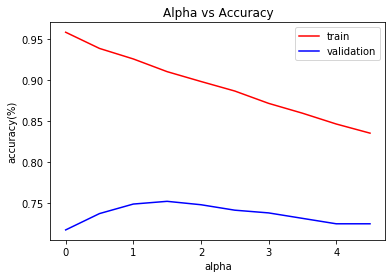

In [4]:
# todo: plot x = alpha, y = accuracy, color = [train, validation]

import matplotlib.pyplot as plt

data = pd.DataFrame.from_dict(data)

data_train = data[data['type'] == 'train']
data_val = data[data['type'] == 'validation']

plt.plot(data_train['alpha'], data_train['acc'], label = 'train', c = 'red')
plt.plot(data_val['alpha'], data_val['acc'], label = 'validation', c = 'blue')
plt.xlabel("alpha")
plt.ylabel("accuracy(%)")
plt.title("Alpha vs Accuracy")
plt.legend(['train', 'validation'])
plt.show()

Based on our plot, the alpha value that is the best for model performance (i.e., the alpha with the best validation accuracy) is **alpha = 1**. We see printed earlier that for our optimal alpha:

train accuracy: 0.921795933389 

validation accuracy 0.790562913907 

## Step 3: Evaluate on Test Set

3.1 With the optimal `alpha` you found in step 2, fit the Naive Bayes classifer on (train + validation) set and evaluate the model performance on the test set. Report the test accuracy. 

Note: After measuring test accuracy, do **not** change `alpha` any more. You should only change `alpha` during cross-validation (step 2). If you change `alpha` after looking at test acccuracy, you leak information from the test set to the model and your test accuracy will not be an unbiased estimator of the model's prediction accuracy any more!

In [5]:
# combine train and validation to form a new train set
X_train_total = X_train.append(X_val)
y_train_total = y_train.append(y_val)

# fit Naive Bayes classifier on X_train_total and y_train_total

clf = MultinomialNB(alpha = 1)

X_train_vec = vectorizer.transform(X_train_total).toarray()
clf.fit(X_train_vec, y_train_total)
print('train accuracy:', clf.score(X_train_vec, y_train_total))

X_test_vec = vectorizer.transform(X_test).toarray()
print('test accuracy', clf.score(X_test_vec, y_test))


train accuracy: 0.919433634180674
test accuracy 0.7831594634873323
